In [1]:
import pickle
import warnings

import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

from utils.plots import bar_metrics


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

with open('results/scores.pickle', 'rb') as handle:
    resultsDict = pickle.load(handle)

# Load our results from the model notebook
with open('results/predictions.pickle', 'rb') as handle:
    predictionsDict = pickle.load(handle)

# Results analysis and discussion

#  Results

## Evaluation Metrics

There are many measures that can be used to analyze the performance of our prediction so we will be using the top 4 most used metrics for time series forecasting. Each of this metrics are different from the others in the way the test our predictions so don't expect a model to perform best in all metrics. Choosing the right metric for your problem is also a big challenge, this will depend on your forecasting needs.

* [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)
* [Mean Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)
* [Root Mean Squared Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
* [R2 Coefficient of determination (r2)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

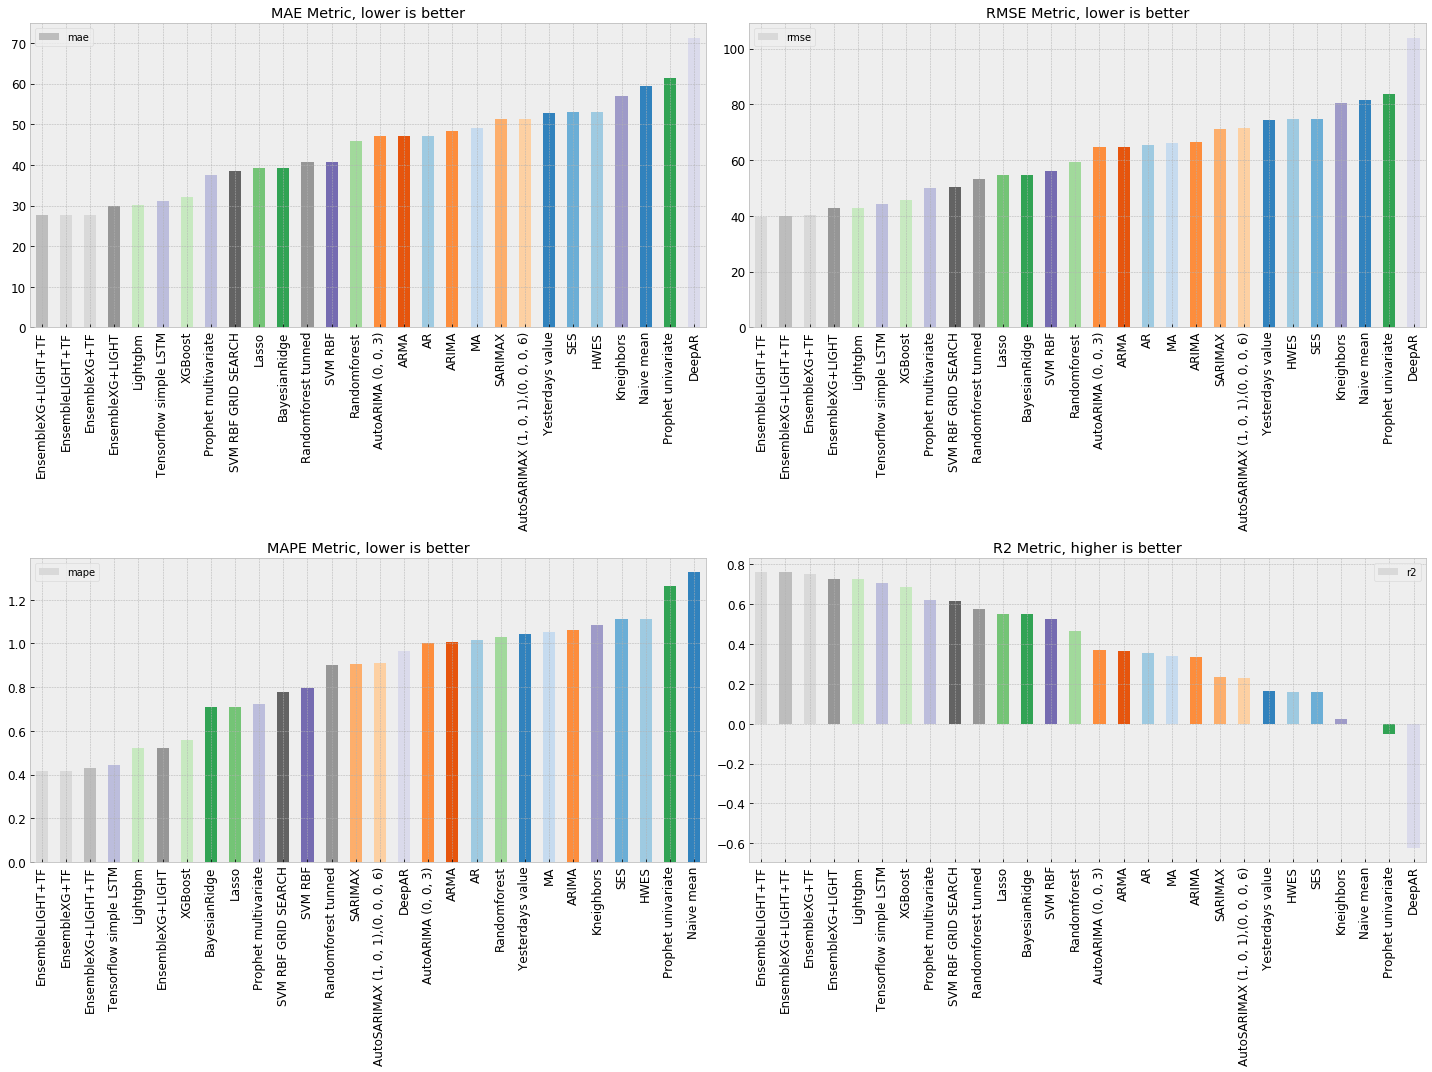

In [2]:
bar_metrics(resultsDict)

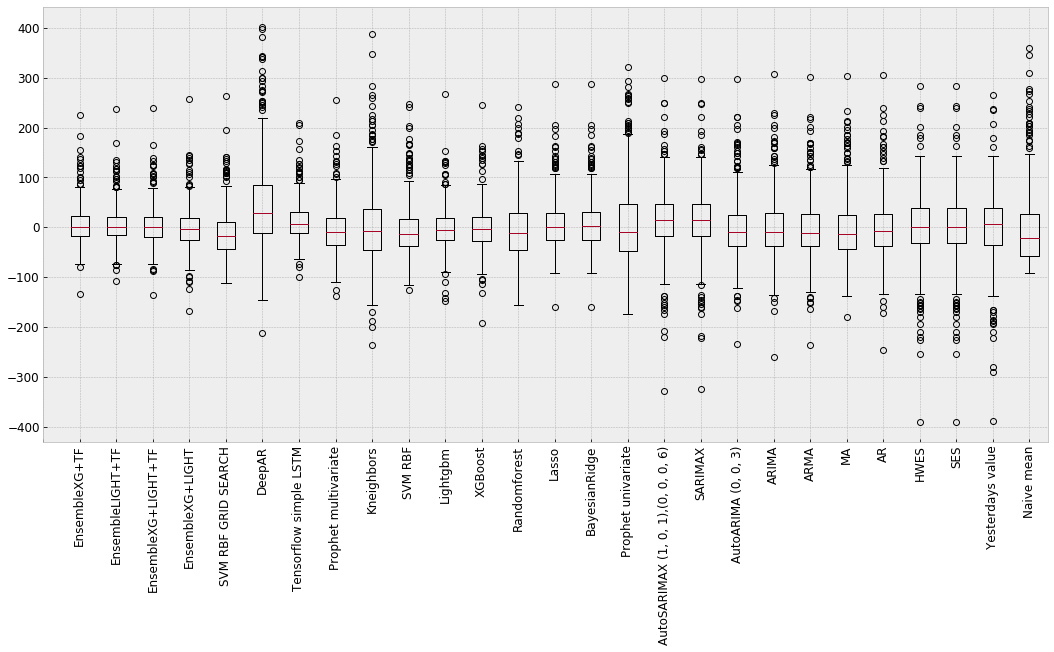

In [3]:
df_test = pd.read_csv("datasets/test.csv")
residuals = [df_test.pollution_today.values - predictionsDict[u]
             for u in predictionsDict.keys()]
residuals.reverse()
plt.boxplot(residuals)
ticks = list(predictionsDict.keys())
ticks.reverse()
ticks = [''] + ticks
rang = range(0, len(ticks))
plt.xticks(rang, ticks, rotation='vertical')
pass

# Conclusion

First and most obvious lesson from this tutorial should be the importance of extra features to describe your time series. We have seen how most of the models that took use of the extra data outperforms traditional statistics for univariate time series. Is also worth mentioning the importance of doing an extensive analysis of our series to detect stationarity or special seasonalities that may require us to apply some transform to the series and will probably determine our model selection. Blind selection of models should never be the case and we should always aim for a good understanding of our series.

For some more in detail discussion about the result, I personally was not surprise to see the tree models come on top as they are one of the most used models right now thanks for their easy use and great performance. I was surprise to see our LSTM model come up with such close scores to the tree models with such a little dataset, deep learning methods are known for their good performance but only if enourmous datasets are provided.

